In [46]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [88]:
csv_file = "../data/spotify_dataset.csv"
spotify_df = pd.read_csv(csv_file, sep=",")
print(f"Dataset shape: {spotify_df.shape[0]} Rows and {spotify_df.shape[1]} Columns")
spotify_df.head()

Dataset shape: 114000 Rows and 21 Columns


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [89]:
spotify_df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

#### Columns:

- **track_id:** Spotify ID for the track.

- **artists:** Names of the track's performing artists (semicolon-separated if multiple).
- **album_name:** Name of the album containing the track.
- **track_name:** Name of the track.
- **popularity:** A measure of track popularity, ranging from 0 to 100.
- **duration_ms:** Track length in milliseconds.
- **explicit:** Indicates if the track has explicit lyrics (true = yes, false = no or unknown).
- **danceability:** Describes how suitable the track is for dancing, with values between 0.0 (least danceable) and 1.0 (most danceable).
- **energy:** A measure of intensity and activity in the track, ranging from 0.0 to 1.0.
- **key:**  The musical key of the track, mapped to standard Pitch Class notation (e.g., 0 = C, 1 = C♯/D♭).
- **loudness:** Overall loudness of the track in decibels (dB).
- **mode:** Indicates the modality (major or minor) of the track's melodic content (1 for major, 0 for minor).
- **speechiness:** Detects the presence of spoken words in the track, with values from 0.0 to 1.0.
- **acousticness:** A confidence measure of whether the track is acoustic (1.0 for high confidence).
- **instrumentalness:**  Predicts if the track contains no vocals, with values closer to 1.0 indicating no vocal content.
- **liveness:** Detects the presence of an audience in the recording, with values above 0.8 indicating a high likelihood of a live performance.
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by the track.
- **tempo:** Estimated tempo of the track in beats per minute (BPM).
- **time_signature:** Estimated time signature, ranging from 3 to 7 (e.g., 3/4 to 7/4).
- **track_genre:** The genre to which the track belongs.

In [90]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

We can see that 'mode' should be a boolean value just like 'explicit'. Also, the 'Unnamed' column is pretty much useless.

In [91]:
spotify_df = spotify_df.drop('Unnamed: 0', axis=1)

In [92]:
spotify_df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

We can see that the artist, album name and track name have one null value each, are these null values in the same row? If that's the case, we might have to drop that row eventually.

In [93]:
rows_with_nulls = spotify_df[spotify_df.isnull().any(axis=1)]
print(rows_with_nulls)

                     track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop  


We can see that, in fact, it's a single row that contains null values for the aforementioned columns.

In [94]:
spotify_df.nunique()

track_id            89741
artists             31437
album_name          46589
track_name          73608
popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45653
time_signature          5
track_genre           114
dtype: int64

In [95]:
spotify_df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [96]:
spotify_df.describe(include=["bool", "object"])

,track_id,artists,album_name,track_name,explicit,track_genre
count,114000,113999,113999,113999,114000,114000
unique,89741,31437,46589,73608,2,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,False,acoustic
freq,9,279,195,151,104253,1000


Why are there repeated songs in this dataset? Let's look more into that...

In [97]:
spotify_df.sort_values(by = 'track_name').head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
36750,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,!I'll Be Back!,52,178533,True,0.823,0.6120,1,-7.767,1,0.2480,0.168000,0.00000,0.1090,0.6880,142.959,4,french
92751,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,"""A"" You're Adorable",39,151680,False,0.615,0.3750,0,-10.362,0,0.0319,0.482000,0.00000,0.1110,0.9220,110.720,4,rockabilly
66970,1B45DvGMoFWdbAEUH2qliG,Little Apple Band,The Favorite Songs Of Sesame Street,"""C"" IS FOR COOKIE",32,84305,False,0.553,0.8120,3,-5.542,1,0.0558,0.132000,0.00001,0.0794,0.8710,118.368,4,kids
66996,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,"""C"" is for Cookie",8,86675,False,0.664,0.6110,3,-8.687,1,0.0886,0.120000,0.00000,0.0408,0.7580,118.443,4,kids
101161,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,"""Christe, Redemptor omnium""",0,289133,False,0.111,0.0568,10,-28.053,1,0.0551,0.990000,0.69700,0.1100,0.0395,169.401,1,sleep
82584,5Zx0Rrkn5RFBMD2PRxX3mI,Dillinger Four,C I V I L W A R,"""Contemplate This on the Tree of Woe.""",24,180706,False,0.565,0.9770,11,-3.592,1,0.0546,0.028200,0.00132,0.4330,0.3870,106.478,4,power-pop
5980,3ozivYJGJGq6TSzdy8m64X,Capcom Sound Team,デビル メイ クライ 3 オリジナル・サウンドトラック,"""DEVILS NEVER CRY""(スタッフロール)",55,319906,False,0.264,0.9510,7,-7.356,1,0.1460,0.000894,0.04420,0.1270,0.1590,149.990,4,anime
93440,3KKk48f33mlB56F5L5nbJk,Nikolay Kopylov,Popular Opera Arias,"""Don Carlos"" Roderigo'S Death Aria",0,235547,False,0.167,0.3320,1,-9.888,1,0.0359,0.992000,0.19100,0.1130,0.0527,62.970,4,romance
93397,3KKk48f33mlB56F5L5nbJk,Nikolay Kopylov,Popular Opera Arias,"""Don Carlos"" Roderigo'S Death Aria",0,235547,False,0.167,0.3320,1,-9.888,1,0.0359,0.992000,0.19100,0.1130,0.0527,62.970,4,romance
93895,5OiONTndVC5YOMXg6VC5xs,Nikolay Kopylov,Popular Opera Arias,"""Eugene Onegin"" Ariozo Of Onegin",0,111800,False,0.443,0.5140,10,-8.068,1,0.0924,0.988000,0.00187,0.0918,0.2440,100.752,4,romance


We can see two songs with the same title but one is in lower case and the other is in upper case. Despite the fact that these two come from different albums, if they come from the same artist, I will treat them as the same track.

In [111]:
spotify_df['track_name'] = spotify_df['track_name'].str.lower()
spotify_df.duplicated(subset=['track_name','artists']).sum()

32793

There are 32793 duplicated songs in the dataset.

In [100]:
grouped_df = spotify_df.groupby(['track_name','artists']).size().reset_index(name='count') # grouping by artist and track name
grouped_df.sort_values(by = 'count', ascending= False) # sorting descending

,track_name,artists,count
56404,run rudolph run,Chuck Berry,151
38577,little saint nick - 1991 remix,The Beach Boys,76
37077,last last,Burna Boy,75
24351,frosty the snowman,Ella Fitzgerald,69
12284,christmas time,Bryan Adams,66
...,...,...,...
30094,i am so mad at you,AJJ,1
30096,i am the black wizards,Emperor,1
30097,i am the demon,Speedwolf,1
30098,i am the fire,Halestorm,1


There is a total of 81206 unique songs. The one that repeats the most appears 151 times in the dataset. The next step is taking only one of the repeating songs so that the dataset ends up with 81206 tracks in total.

In [102]:
popular_songs = spotify_df.groupby(['track_name','artists'])['popularity'].idxmax() # grouping by track name, artist and album name and choosing the row with the highest popularity
unique_songs = spotify_df.loc[popular_songs] # rows with the song with the highest popularity
unique_songs

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
36750,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,!i'll be back!,52,178533,True,0.823,0.6120,1,-7.767,1,0.2480,0.1680,0.000000,0.1090,0.6880,142.959,4,french
92751,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,"""a"" you're adorable",39,151680,False,0.615,0.3750,0,-10.362,0,0.0319,0.4820,0.000000,0.1110,0.9220,110.720,4,rockabilly
66970,1B45DvGMoFWdbAEUH2qliG,Little Apple Band,The Favorite Songs Of Sesame Street,"""c"" is for cookie",32,84305,False,0.553,0.8120,3,-5.542,1,0.0558,0.1320,0.000010,0.0794,0.8710,118.368,4,kids
101161,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,"""christe, redemptor omnium""",0,289133,False,0.111,0.0568,10,-28.053,1,0.0551,0.9900,0.697000,0.1100,0.0395,169.401,1,sleep
82584,5Zx0Rrkn5RFBMD2PRxX3mI,Dillinger Four,C I V I L W A R,"""contemplate this on the tree of woe.""",24,180706,False,0.565,0.9770,11,-3.592,1,0.0546,0.0282,0.001320,0.4330,0.3870,106.478,4,power-pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65756,2oVHb8wyg6oC2iNpGBNvx1,HEIZE,Hotel del Luna (Original Television Soundtrack...,내 맘을 볼 수 있나요,63,225785,False,0.397,0.1660,9,-10.678,1,0.0349,0.8840,0.000000,0.1000,0.1310,134.708,4,k-pop
65859,4kIpBfvK44bxqX7zo8K1oP,Gaho,ITAEWON CLASS (Original Television Soundtrack)...,시작,65,202440,False,0.591,0.8180,4,-3.532,1,0.0730,0.1720,0.000000,0.1260,0.5740,108.107,4,k-pop
75903,4mHc7LUlO3k6AXeFV2EiJK,Yiruma,Yiruma Official Album 'Piano Therapy' (The Ori...,약속 (piano solo),37,144533,False,0.504,0.1430,1,-18.713,1,0.0701,0.9800,0.922000,0.1240,0.0584,148.786,4,new-age
79554,0tQesiSZJQOdHeAC7r59us,GODA,One Punch Man (Original Soundtrack),원펀맨 theme - sad theme,37,228000,False,0.542,0.3370,2,-16.088,1,0.0539,0.9850,0.933000,0.1470,0.4430,159.951,4,piano


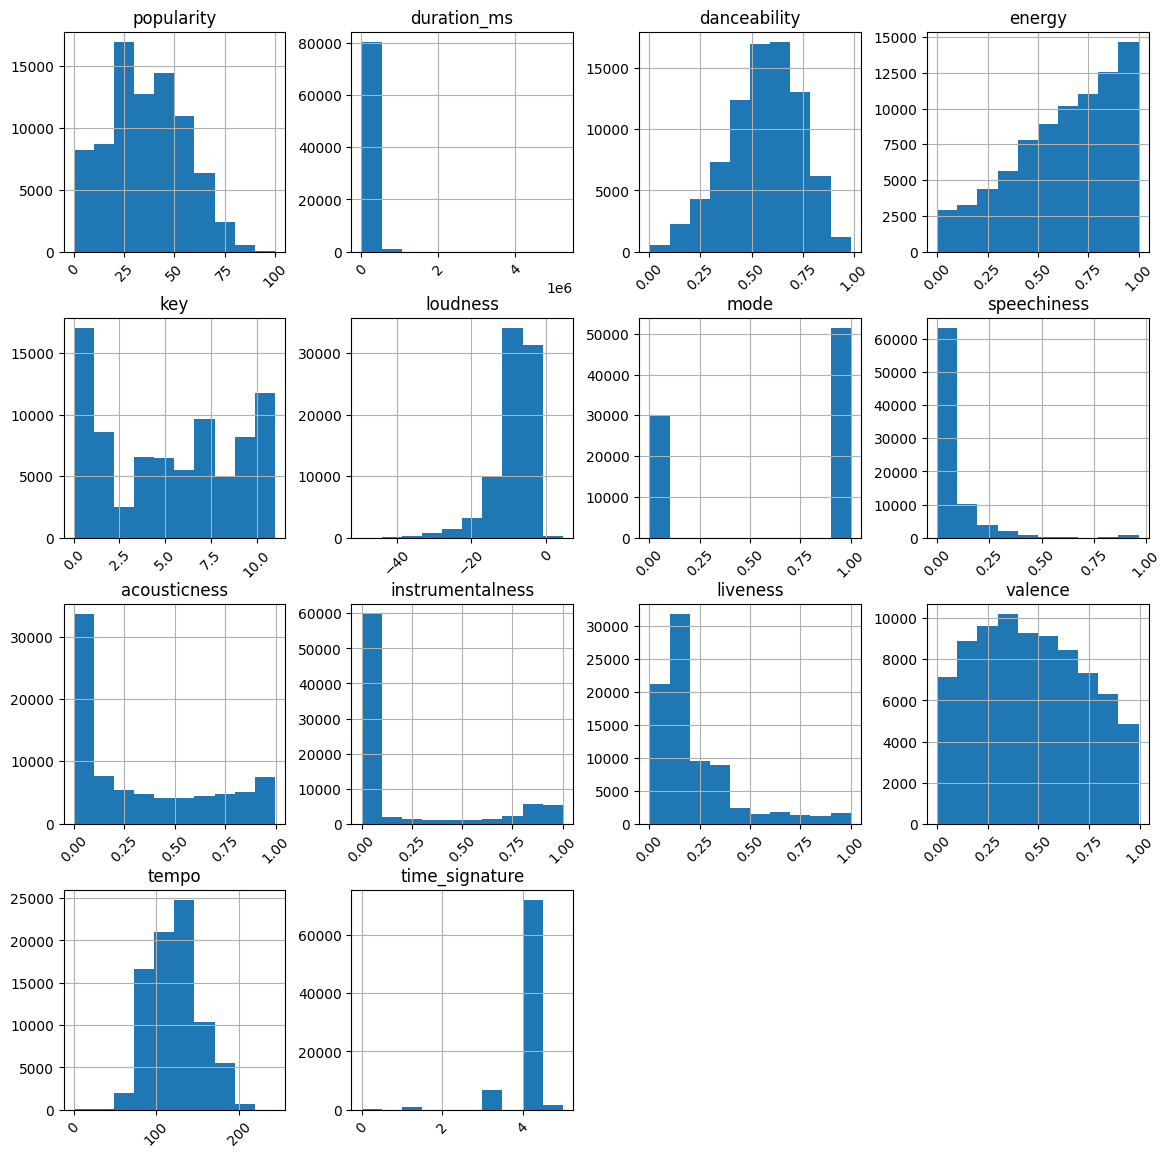

In [104]:
unique_songs.hist(figsize=(14, 14), xrot=45)
plt.show()

As we can see,the mode column is being treated as an integer, but it should be represented as a boolean. This issue needs correction during the transformation phase. 

From the other histograms we can see that, for instance, the majority of songs have both low speechiness, instrumentalness and acousticness. Additionally, since the duration is expressed in miliseconds, we can't really distinguish the duration of the songs, from the histogram, we can see that the duration ranges from 0 to 1000000 miliseconds, which is 0 to 16 minutes. Therefore it would be easier to interpret if the duration was expressed in another measurement like seconds or minutes.

track_genre
study          996
black-metal    990
comedy         987
heavy-metal    981
bluegrass      976
              ... 
reggae         189
rock           187
house          136
indie          105
reggaeton       68
Name: count, Length: 113, dtype: int64


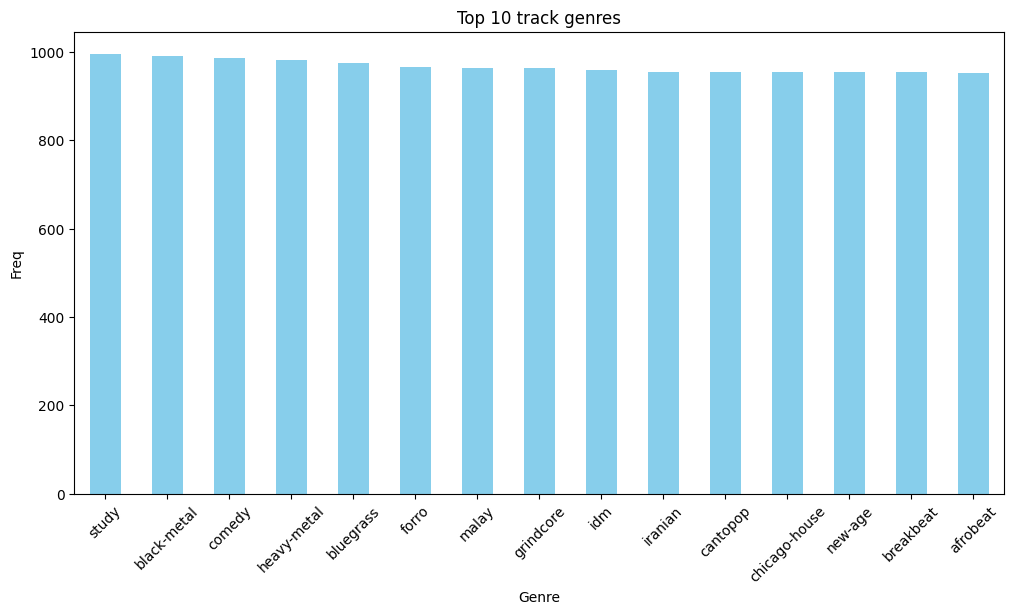

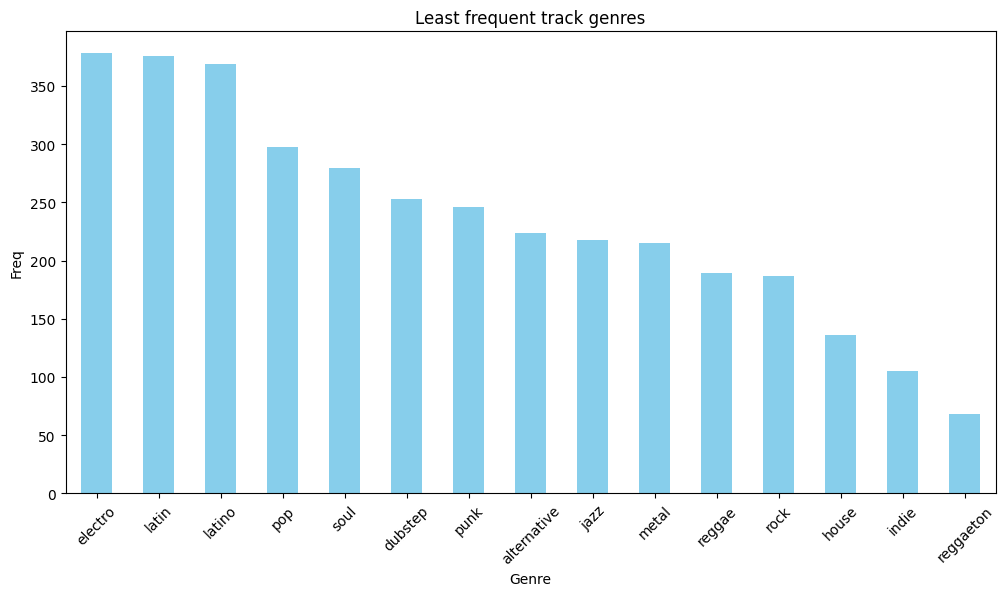

In [105]:
genre_counts = unique_songs['track_genre'].value_counts()
print(genre_counts)

top_10_genres = genre_counts.head(15)

plt.figure(figsize=(12, 6))
top_10_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 track genres')
plt.xlabel('Genre')
plt.ylabel('Freq')
plt.xticks(rotation=45)
plt.show()


least_freq = genre_counts.tail(15)

plt.figure(figsize=(12, 6))
least_freq.plot(kind='bar', color='skyblue')
plt.title('Least frequent track genres')
plt.xlabel('Genre')
plt.ylabel('Freq')
plt.xticks(rotation=45)
plt.show()

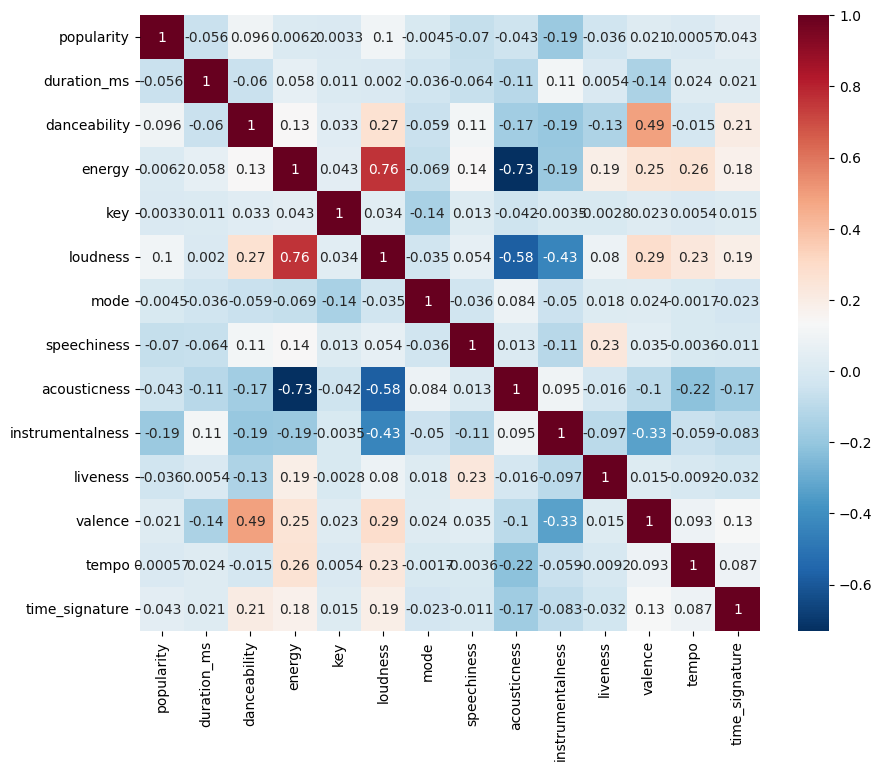

In [106]:
numeric_cols = unique_songs.select_dtypes(include=['number']) 
corrs = numeric_cols.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

This corrplot shows the correlation between the numerical columns of the dataset. This reveals information that could be anticipated, such as the negative correlation between energy and loudness with acousticness, indicating that higher energy corresponds to lower acousticness and, consequently, higher loudness which, in turn, has a negative correlationn with instrumentalness. Similarly, a positive correlation between valence and danceability can be noted, suggesting that a happier song tends to be more danceable than another.

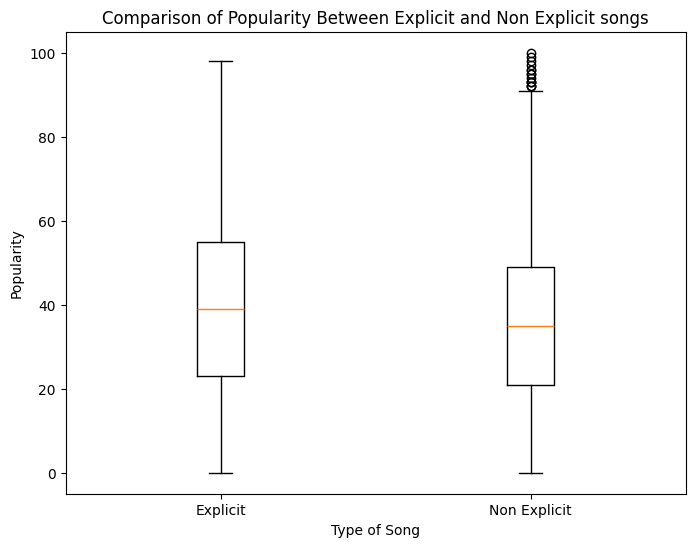

In [109]:
explicit_songs = unique_songs[unique_songs['explicit'] == True]['popularity']
non_explicit_songs = unique_songs[unique_songs['explicit'] == False]['popularity']

plt.figure(figsize=(8, 6))
plt.boxplot([explicit_songs, non_explicit_songs], labels=['Explicit', 'Non Explicit'])
plt.title('Comparison of Popularity Between Explicit and Non Explicit songs')
plt.xlabel('Type of Song')
plt.ylabel('Popularity')
plt.show()

Through this graph, we could conclude that non-explicit songs are slightly less popular than the explicit ones, however, the have a few outliers that show a significant value of popularity.

Based on this exploratory data analysis, I decided to remove the columns key, mode, tempo and time_signature since these are technicisms about music theory that will not be included in the future analysis. Adittionally, the colums speechiness, instrumentalness and liveness are also not very valuable for this approach.

Also, since danceability, energy, acousticness and valence range from 0 to 1, I'm going to recode them to go from 0 to 100, and compare them with popularity that already ranges from 0 to 100.